In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dftpy.grid import DirectGrid
from dftpy.field import DirectField
from dftpy.functional import LocalPseudo, Functional, TotalFunctional
from dftpy.optimization import Optimization
from dftpy.constants import environ


In [2]:
environ['LOGLEVEL'] = 4

In [ ]:
Li_LDA_OEPP_UPF = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/PP/Li_OEPP_PZ.UPF"
Li_LDA_GBRV_UPF = "/projectsn/mp1009_1/Valeria/NLPP/PP/li_lda_v1.4.uspp.F.UPF"
Li_LDA_POEPP_revHC_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/OEPP/revHC/POEPP_LDA_revHC.psp8"
Li_LDA_POEPP_TFvW_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/OEPP/TF02vW/POEPP_LDA_TF02vW.psp8"
Li_LDA_PGBRV_revHC_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/GBRV/revHC/PGBRV_LDA_revHC.psp8"
Li_LDA_PGBRV_TFvW_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/GBRV/TF02vW/PGBRV_LDA_TF02vW.psp8"
# Li_VASP = '/projectsn/mp1009_1/Valeria/Plasmons/Alchemichal/Ge-Si//Ge10.vasp'
ELEMENT_LABEL = "Li"  # keep label for DFTpy mapping

In [ ]:
from psp82upf import psp8_to_upf

psp8_to_upf(Li_LDA_POEPP_TFvW_PSP8, "POEPP_LDA_TF02vW.UPF", element_label="Li")
psp8_to_upf(Li_LDA_POEPP_revHC_PSP8, "POEPP_LDA_revHC.UPF", element_label="Li")
psp8_to_upf(Li_LDA_PGBRV_TFvW_PSP8, "PGBRV_LDA_TF02vW.UPF", element_label="Li")
psp8_to_upf(Li_LDA_PGBRV_revHC_PSP8, "PGBRV_LDA_revHC.UPF", element_label="Li")

Converted PSP8 → UPF: /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/OEPP/TF02vW/POEPP_LDA_TF02vW.psp8 → POEPP_LDA_TF02vW.UPF
Converted PSP8 → UPF: /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/OEPP/revHC/POEPP_LDA_revHC.psp8 → POEPP_LDA_revHC.UPF
Converted PSP8 → UPF: /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/GBRV/TF02vW/PGBRV_LDA_TF02vW.psp8 → PGBRV_LDA_TF02vW.UPF
Converted PSP8 → UPF: /projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/LDA/GBRV/revHC/PGBRV_LDA_revHC.psp8 → PGBRV_LDA_revHC.UPF


In [ ]:
Li_PBE_POEPP_revHC_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/PBE/OEPP/revHC/POEPP_PBE_revHC.psp8"
Li_PBE_POEPP_TFvW_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/PBE/OEPP/TF02vW/POEPP_PBE_TF02vW.psp8"
Li_PBE_PGBRV_revHC_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/PBE/GBRV/revHC/PGBRV_PBE_revHC.psp8"
Li_PBE_PGBRV_TFvW_PSP8 = "/projectsn/mp1009_1/Valeria/Batteries/Li2S_interface/OF/Li/pp_repo/metal/OF/PBE/GBRV/TF02vW/PGBRV_PBE_TF02vW.psp8"

In [33]:
from dftpy.ions import Ions
from ase.build import bulk
from ase.io import read
atoms  = bulk('Li', 'bcc', 3.51)
ions = Ions.from_ase(atoms)
grid = DirectGrid(lattice=ions.cell, ecut=20)#rho_ks.grid

## Observe the local PP for POEPP and PGBRV

In [34]:
PP_list_psp8 = {'Li': Li_POEPP_TFvW_PSP8}
PP_list_upf = {'Li': 'POEPP_LDA_TF02vW.UPF'}
PP_list_oepp = {'Li': Li_OEPP_UPF}

pseudo_psp8 = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_psp8)
pseudo_upf = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_upf)
pseudo_oepp = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_oepp)

R_Li_upf_oepp = pseudo_psp8.readpp.pp['Li'].r
V_Li_psp8_oepp = pseudo_psp8.readpp.pp['Li'].v
V_Li_upf_oepp = pseudo_upf.readpp.pp['Li'].v
V_Li_oepp = pseudo_oepp.readpp.pp['Li'].v


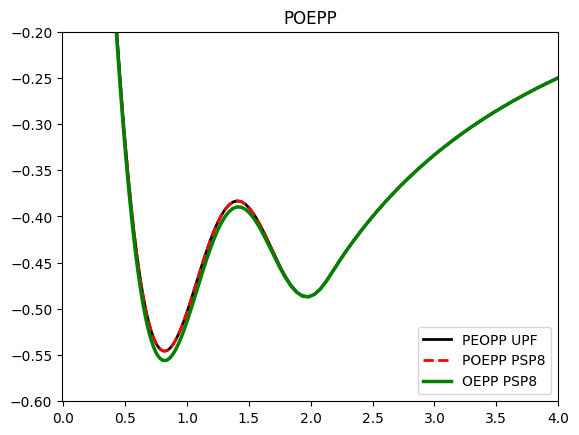

In [35]:
plt.plot(R_Li_upf_oepp, V_Li_upf_oepp, lw=2  , color='k', label='PEOPP UPF')
plt.plot(R_Li_upf_oepp, V_Li_psp8_oepp, lw=2  , ls='--',color='r', label='POEPP PSP8')

plt.plot(pseudo_oepp.readpp.pp['Li'].r, V_Li_oepp, lw=2.5  , ls='-',color='g', label='OEPP PSP8')
plt.title('POEPP')
plt.xlim(-0.01,4)
plt.ylim(-0.6,-0.2)
plt.legend()

In [36]:
def opt_density(PP_list, ions):
    pseudo = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list)
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_charges() / ions.cell.volume
    ke = Functional(type="KEDF", name="TFvW", y=0.2)
    # core_density = pseudo.core_density
    xc = Functional(type="XC", name="LDA")#, core_density=core_density)
    hartree = Functional(type="HARTREE")
    total = TotalFunctional(KineticEnergyFunctional=ke, XCFunctional=xc, HARTREE=hartree, PSEUDO=pseudo)
    opt = Optimization(EnergyEvaluator=total, optimization_method="CG",
                       optimization_options={"econv": 1e-6 * ions.nat})
    rho0 = opt.optimize_rho(guess_rho=rho_ini)
    return rho0

In [37]:
rho_psp8 = opt_density(PP_list_psp8, ions)
rho_upf = opt_density(PP_list_upf, ions)
den_diff = 0.5 * np.abs(rho_psp8 - rho_upf).integral()
den_diff

0.0

In [38]:
PP_list_psp8 = {'Li': Li_PGBRV_TFvW_PSP8}
PP_list_upf = {'Li': 'PGBRV_LDA_TF02vW.UPF'}
PP_list_gbrv = {'Li': Li_GBRV_UPF}
pseudo_psp8 = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_psp8)
pseudo_upf = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_upf)
pseudo_gbrv = LocalPseudo(grid=grid, ions=ions, PP_list=PP_list_gbrv)
from dftpy.functional.pseudo import upf
def read_upf(upf_file):
    pp = upf.UPFDICT(upf_file)
    r = pp.r
    v = pp.v
    return r, v

R_Li_upf, V_Li_upf = read_upf(PP_list_upf['Li'])
R_Li_upf2, V_Li_upf2 = read_upf(Li_GBRV_UPF)
V_Li_psp8 = pseudo_psp8.readpp.pp['Li'].v
V_Li_gbrv = pseudo_gbrv.readpp.pp['Li'].v
# V_Li_upf = pseudo_upf.readpp.pp['Li'].v


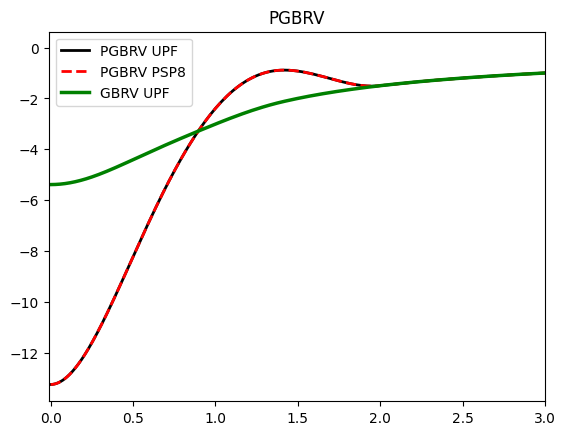

In [39]:
plt.plot(R_Li_upf, V_Li_upf, lw=2  , color='k', label='PGBRV UPF')
plt.plot(R_Li_upf, V_Li_psp8, lw=2  , ls='--',color='r', label='PGBRV PSP8')

plt.plot(pseudo_gbrv.readpp.pp['Li'].r, V_Li_gbrv, lw=2.5  , ls='-',color='g', label='GBRV UPF')
plt.title('PGBRV')
plt.xlim(-0.01,3)
plt.legend()